# Waze Project

## Understand Business Scenario and Problem

**Project Background**

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. 

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as: 

* Who are the users most likely to churn?

* Why do users churn? 

* When do users churn? 


Work on a machine learning model to predict user churn.

### Understand Data

**Import Libraries**

In [ ]:
"""! pip install ipykernel -U --force-reinstall'
! pip install numpy
! pip install  pandas
! pip install matplotlib
! pip install seaborn
! pip install scipy
! pip install sklearn
! pip install xgboost """

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Data/waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df.describe(include = 'all')

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,4329.982679,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,3749.500000,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,7499.000000,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,11248.500000,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


**Data Prepocessing**

In [ ]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [ ]:
df[df['label'].isnull()]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
77,77,NaN,63,50,133.104155,783,201,0,2649.015822,1517.209970,19,13,iPhone
80,80,NaN,116,93,436.060183,1584,283,62,4183.409514,3121.889952,18,15,iPhone
98,98,NaN,78,64,583.492789,3414,0,0,1811.140893,642.189122,12,11,Android
111,111,NaN,106,102,113.379056,2228,14,0,2817.481840,2011.724274,17,13,Android
142,142,NaN,32,26,222.129310,208,55,10,2459.816477,874.427617,11,7,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941,14941,NaN,191,160,485.328204,1287,25,0,6468.181924,3466.104564,14,14,iPhone
14943,14943,NaN,48,38,96.797017,555,0,6,8266.129497,5902.351711,19,19,iPhone
14945,14945,NaN,34,29,134.416604,1643,268,2,4554.007843,1579.211201,18,17,Android
14972,14972,NaN,220,181,256.212166,1718,360,23,5586.913459,4104.440202,19,18,iPhone


In [ ]:
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

In [ ]:
df_archive = df.copy()
df = df.dropna(axis=0)
df[df['label'].isnull()]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device


**Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

### EDA

In [ ]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


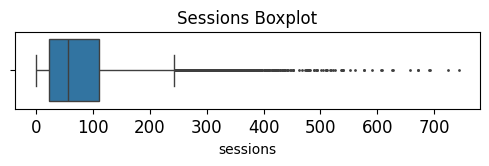

In [ ]:
# Boxlplot Sessions
plt.figure(figsize=(6, 1))
plt.title('Sessions Boxplot')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df['sessions'], fliersize = 1)
plt.show()

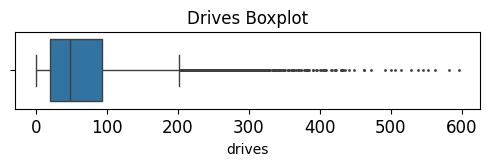

In [ ]:
# Boxlplot Drives
plt.figure(figsize=(6, 1))
plt.title('Drives Boxplot')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df['drives'], fliersize = 1)
plt.show()

The data has lot of outliers, but it is not a concern as we will be using tree based models and skip regressions.

In [ ]:
df['device'].value_counts(normalize=True)

device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64

In [ ]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

**Data Visualisations**

In [ ]:
df.groupby(['device'])['drives'].mean()

device
Android    66.024241
iPhone     67.933225
Name: drives, dtype: float64

In [ ]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

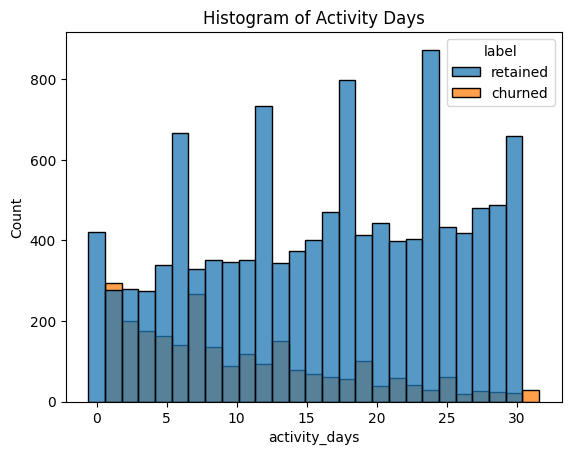

In [ ]:
sns.histplot(data = df, x='activity_days', hue='label', multiple='dodge', shrink=2)
plt.title('Histogram of Activity Days');


As it appears, churn rate is high during early activity days as compared to long use.

In [ ]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

**Variable Encoding**

In [ ]:
# Create 2 new columns `device2`, `label2` and encode categories into binaries.
df['device2'] = np.where(df['device'] == 'Android', 0, 1)
df['label2'] = np.where(df['label'] == 'churned', 1, 0)
df[['device', 'device2', 'label', 'label2']].tail() 

,device,device2,label,label2
14994,iPhone,1,retained,0
14995,Android,0,retained,0
14996,iPhone,1,retained,0
14997,iPhone,1,churned,1
14998,iPhone,1,retained,0


**New Calculated Column** [Feature Engineering]

We will create a new binary column `professional_driver` who drives more than or equal to 60 drives for the past 15+ days.

In [ ]:
df['km_driving_per_day'] = df['driven_km_drives']/df['driving_days']
df.loc[df['km_driving_per_day'] == np.inf, 'km_driving_per_day'] = 0
df['km_driving_per_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_driving_per_day, dtype: float64

In [ ]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].describe()

count    14299.000000
mean         0.449837
std          0.286863
min          0.000000
25%          0.196890
50%          0.424310
75%          0.687251
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

In [ ]:
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device2,label2,km_driving_per_day,percent_sessions_in_last_month,professional_driver
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0,0,138.360267,0.953670,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1,0,1246.901868,0.406856,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0,0,382.393602,0.841186,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1,0,304.530374,0.724968,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0,0,219.455667,0.499266,1


In [ ]:
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

It looks like unprofessional drivers tend to churn slightly more than professional driver, though not by very large margin. 

It's also useful to know if people who drive to known locations often tend to churn more.
We will use `total_navigations_fav1` and `total_navigations_fav2` against `total sessions`.

In [ ]:
df['percent_of_drives_to_favorite'] = (df['total_navigations_fav1'] + 
                                       df['total_navigations_fav2']) / df['total_sessions']

df['percent_of_drives_to_favorite'].describe()

count    14299.000000
mean         1.676347
std          9.021250
min          0.000000
25%          0.206064
50%          0.653572
75%          1.643183
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

**Correlation Plot**

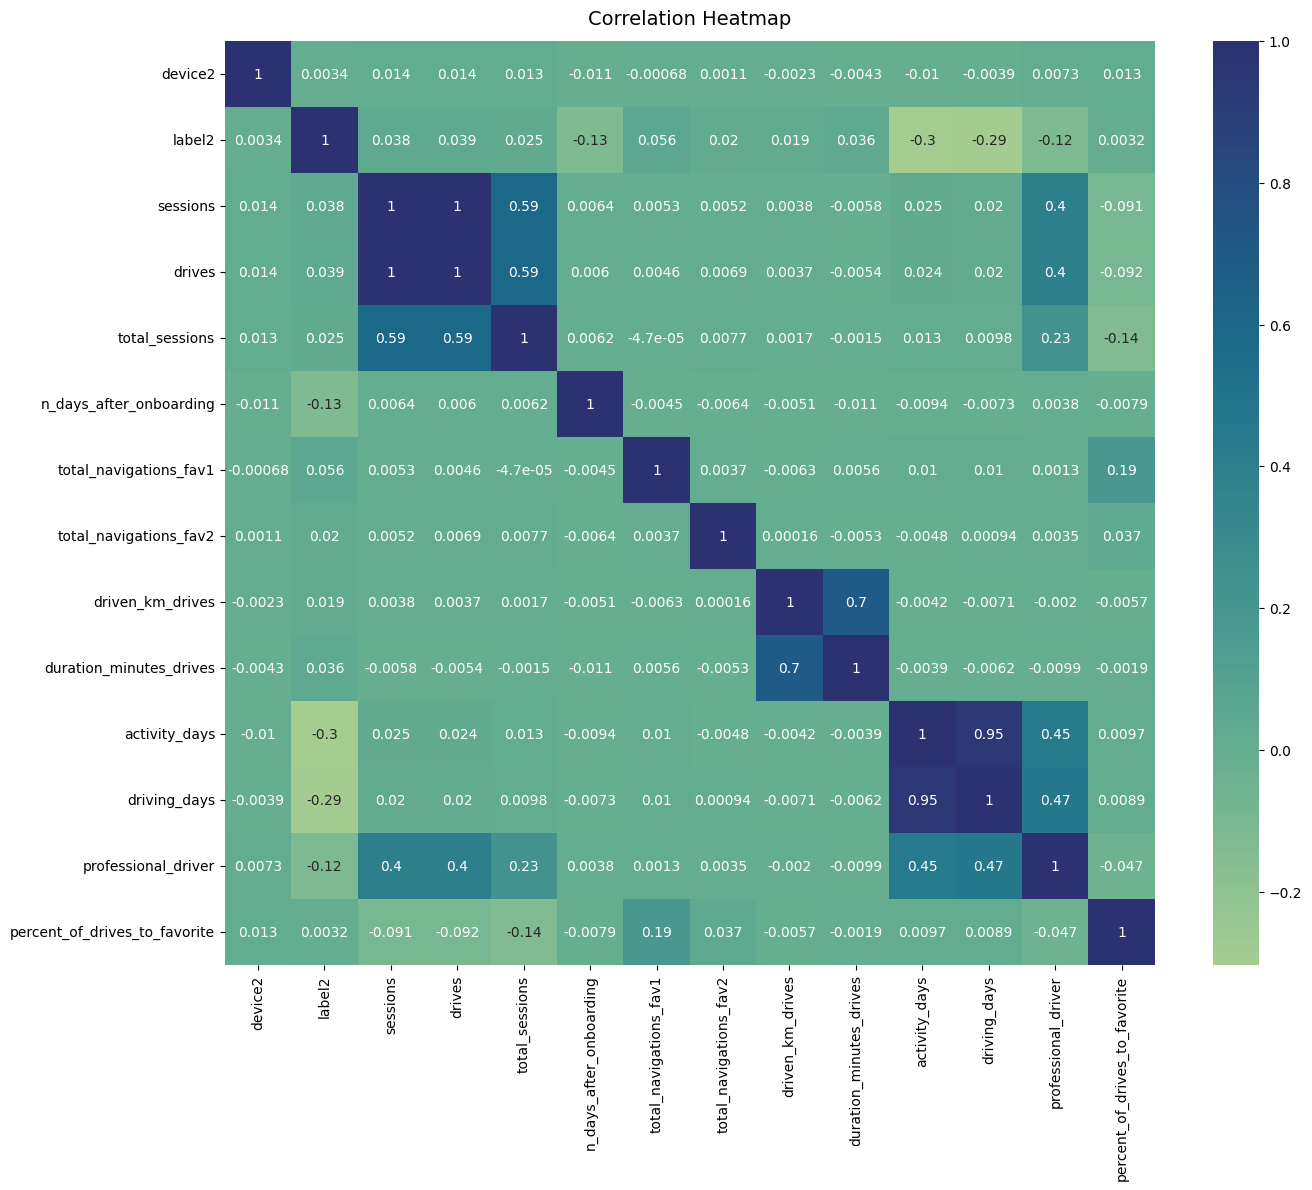

In [ ]:
df_sample = df[['device2', 'label2', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'professional_driver', 'percent_of_drives_to_favorite']]

# df_sample = df_sample.sample(n = 1000, replace = False, random_state = 0)
plt.figure(figsize = (15, 12))
heatmap = sns.heatmap(df_sample.corr(),
                      annot = True,
                      cmap = 'crest')
heatmap.set_title("Correlation Heatmap", fontdict = {'fontsize': 14}, pad = 12);

Understandably there are some strong correlated columns, but most of the columns are are uncorrelated with eachother.

**Data Balance**

In [ ]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [ ]:
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

The data is not well balanced. We can move forward with either balancing or not. Since our focus will be on high recall score rather than accuracy, this unbalance can be tolerated.
Risks involving in making of false positive predictions are minimal in this case scenario. 

In [ ]:
# Identify data points from majority and minority classes
data_majority = df[df["label"] == "retained"]
data_minority = df[df["label"] == "churned"]

# Upsample the minority class (which is "verified")
# Load Library
from sklearn.utils import resample

data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
df_upsampled["label"].value_counts()

label
retained    11763
churned     11763
Name: count, dtype: int64

### Modelling

**Select Dataset**

In [ ]:
df_fil = df_upsampled.drop(columns=['ID', 'device', 'label'])
df_fil.columns

Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'driving_days', 'device2',
       'label2', 'km_driving_per_day', 'percent_sessions_in_last_month',
       'professional_driver', 'percent_of_drives_to_favorite'],
      dtype='object')

In [ ]:
X = df_fil.drop(columns=['label2'])
y = df_fil['label2']

**Load Libraries**

In [ ]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

#### **Random Forest**

In [ ]:
# instantiate random forest classifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
# Create dictionary of hypoerparameters to tune using gridsearch
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [300],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearchCV Object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv=5, refit = 'recall')

Fit model

In [ ]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 41min 31s
Wall time: 44min 17s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
rf_cv.best_score_

np.float64(0.9486562942008486)

In [ ]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [ ]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.835299,0.948656,0.888361,0.880553


#### **XGBoost**

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

In [ ]:
# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate GridSearch
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv = 5, refit='recall')

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 10min 59s
Wall time: 1min 30s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
xgb_cv.best_score_

np.float64(0.9415841584158416)

In [ ]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

In [ ]:
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.835299,0.948656,0.888361,0.880553
0,XGB cv,0.843318,0.941584,0.889735,0.883103


#### Model Selection

Validate both models using validation set.

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [ ]:
rf_val_pred = rf_cv.predict(X_val)
rf_val_scores = get_test_scores('RF val', rf_val_pred, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.835299,0.948656,0.888361,0.880553
0,XGB cv,0.843318,0.941584,0.889735,0.883103
0,RF val,0.852200,0.962617,0.904049,0.897768


In [ ]:
xgb_val_pred = xgb_cv.predict(X_val)
xgb_val_scores = get_test_scores('XGB val', xgb_val_pred, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.835299,0.948656,0.888361,0.880553
0,XGB cv,0.843318,0.941584,0.889735,0.883103
0,RF val,0.852200,0.962617,0.904049,0.897768
0,RF val,0.849850,0.961767,0.902352,0.895855


The scoring of random forest is slightly better than xgboost.

**Predict**

In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_test)

In [ ]:
# Get test scores for XGBoost model
rf_test_scores = get_test_scores('RF test', y_pred, y_test)

# Append to the results table
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.835299,0.948656,0.888361,0.880553
0,XGB cv,0.843318,0.941584,0.889735,0.883103
0,RF val,0.852200,0.962617,0.904049,0.897768
0,RF val,0.849850,0.961767,0.902352,0.895855
0,XGB test,0.844853,0.961522,0.899420,0.893115


**Confusion Matric**

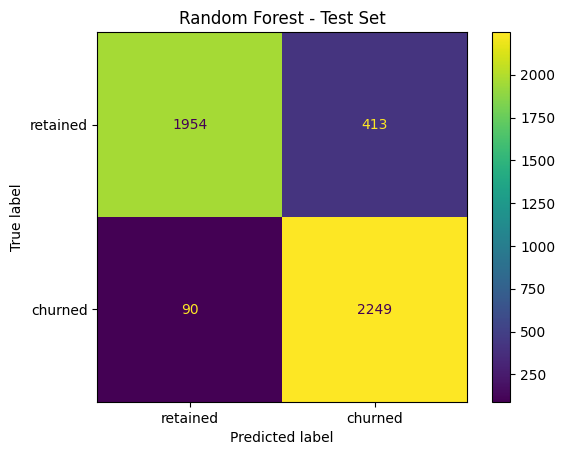

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained',
                                                                      'churned'])

cm_disp.plot()

plt.title('Random Forest - Test Set');

plt.show()

In [ ]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.96      0.83      0.89      2367
     churned       0.84      0.96      0.90      2339

    accuracy                           0.89      4706
   macro avg       0.90      0.89      0.89      4706
weighted avg       0.90      0.89      0.89      4706



The model has 96% recall score. The model is good at predicting true positives. 

**Feature Importance**

Important features that support good performance of the model. `professional_driver` has  little significance, hence we can state that there is no significant correlation in churn rate among professional drivers and amateur drivers.

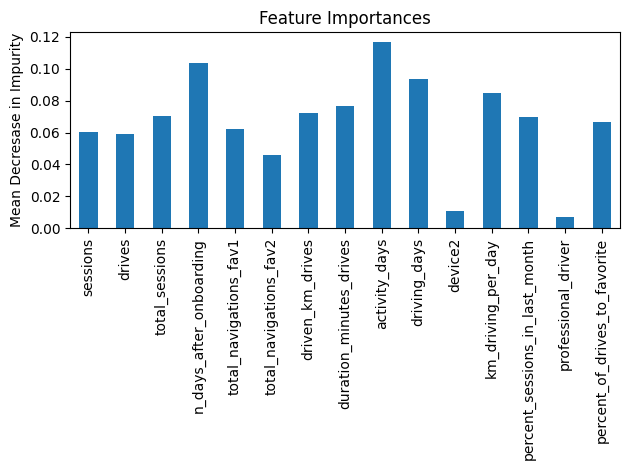

In [ ]:
importance = rf_cv.best_estimator_.feature_importances_
rf_importance = pd.Series(importance, index=X_test.columns)

fig, axes = plt.subplots()
rf_importance.plot.bar(ax = axes)
axes.set_title('Feature Importances')
axes.set_ylabel('Mean Decresase in Impurity')
fig.tight_layout()

The task is ended here, but we will need to iterate this finding to EDA stage in order to improve the performance of the model.